## Relative Strength Index (RSI)

RSI is an indicator which can help guide investors as when to buy/sell a given stock.

Average Gain and Loss is looked at over a period of time, and an RSI value is calculated as

$$ RSI = 100 - {100 \over 1+{Avg Gain \over Avg Loss}} $$

Generally if $RSI<30$ then the stock is **underbought** (so buy) and if $RSI>70$ then stock is **overbought** (so sell).

So we have 2 'hyperparameters' when considering this indicator:

* Lookback period
* RSI thresholds

In [52]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [16]:
## Get APPLE Stock data from the last 4 years
df = yf.download("AAPL", start="2020-01-01", end="2024-12-01", multi_level_index=False)

print(df.head())

[*********************100%***********************]  1 of 1 completed

            Adj Close      Close       High        Low       Open     Volume
Date                                                                        
2020-01-02  72.796013  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088287  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662720  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320969  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484352  75.797501  76.110001  74.290001  74.290001  132079200


<AxesSubplot:xlabel='Date'>

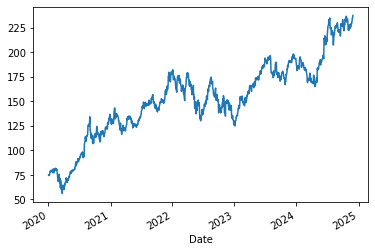

In [24]:
## Take close only
df_close = df['Close']

## View the dataset
df_close.plot()

In [19]:
def RSI(data: pd.Series, period: int = 14):    
    
    # Calculate daily differences
    diff = data.diff()
    
    # Separate gains and losses
    gains = diff.clip(lower=0)
    losses = -diff.clip(upper=0)
    
    # Calculate EMA for gains and losses
    avg_gains = gains.ewm(span=period, adjust=False).mean()
    avg_losses = losses.ewm(span=period, adjust=False).mean()
    
    # Calculate RS and RSI
    RS = avg_gains / avg_losses
    RSI = 100 - (100 / (1 + RS))
    
    return RSI


<AxesSubplot:xlabel='Date', ylabel='Close'>

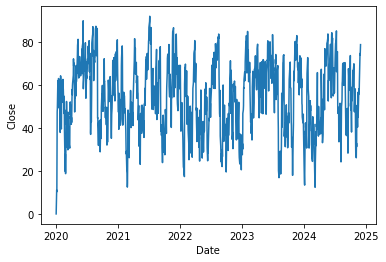

In [27]:
## RSI Plot
sns.lineplot(data=RSI(df_close))

The $RSI$ is very volatile. Perhaps looking over a smaller time period would be better...

In [96]:
df_close_22 = df_close.loc['2022-01-01':'2023-01-01']

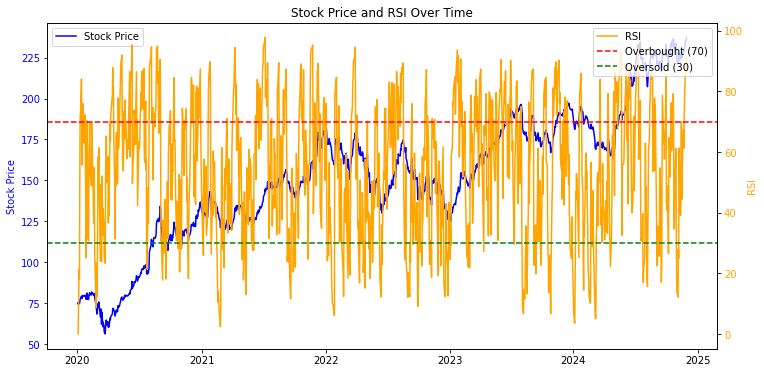

In [106]:
# Plot RSI and stock price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stock Price Plot
ax1.plot(df_close.index, df_close, label='Stock Price', color='blue')
ax1.set_ylabel("Stock Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc="upper left")

# RSI Plot
ax2 = ax1.twinx()
ax2.plot(df_close.index, RSI(df_close,7), label='RSI', color='orange')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax2.set_ylabel("RSI", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
ax2.legend(loc="upper right")

plt.title("Stock Price and RSI Over Time")
plt.show()

In [362]:
import math
## RSI Trading Strategy over the last 4 years

rsi = RSI(df, )
rsi = rsi.iloc[20:]

# Start with $1000 in the bank
bank = 1000

# No stock
stock_count = 0


# Iterate through every day
for date in rsi.index:
    # Get stock value and RSI value
    stock_value = df.loc[date]
    rsi_value = rsi.loc[date]
    
    # If RSI less than 30, and we can afford the stock, buy as many shares as possible
    
    if rsi_value <= 10:
        num_stock_can_afford = math.floor(bank/stock_value)
        if num_stock_can_afford>0:
            bank -= stock_value*num_stock_can_afford
            stock_count+=num_stock_can_afford
            
        
    # if RSI more than 70 and we have stock, sell it all
    
    if rsi_value >= 70 and stock_count>0:
        bank += stock_value * stock_count
        stock_count = 0
    
    total_assets = bank + stock_count*stock_value
    
    if date.day==1:
        print(f'{date.strftime("%d %b %Y")}, assets:{total_assets}, stock:{stock_count}')
    

        
    


01 Apr 2020, assets:1000.0, stock:0
01 May 2020, assets:1000.0, stock:0
01 Jun 2020, assets:1000.0, stock:0
01 Jul 2020, assets:1000.0, stock:0
01 Sep 2020, assets:1000.0, stock:0
01 Oct 2020, assets:1000.0, stock:0
01 Dec 2020, assets:1000.0, stock:0
01 Feb 2021, assets:1000.0, stock:0
01 Mar 2021, assets:1000.0, stock:0
01 Apr 2021, assets:1000.0, stock:0
01 Jun 2021, assets:1000.0, stock:0
01 Jul 2021, assets:1000.0, stock:0
01 Sep 2021, assets:1000.0, stock:0
01 Oct 2021, assets:1000.0, stock:0
01 Nov 2021, assets:1000.0, stock:0
01 Dec 2021, assets:1000.0, stock:0
01 Feb 2022, assets:1000.0, stock:0
01 Mar 2022, assets:1000.0, stock:0
01 Apr 2022, assets:1000.0, stock:0
01 Jun 2022, assets:1000.0, stock:0
01 Jul 2022, assets:1000.0, stock:0
01 Aug 2022, assets:1000.0, stock:0
01 Sep 2022, assets:990.7600555419922, stock:7
01 Nov 2022, assets:1072.1000213623047, stock:0
01 Dec 2022, assets:1072.1000213623047, stock:0
01 Feb 2023, assets:1072.1000213623047, stock:0
01 Mar 2023, asse

In [361]:
total_assets

719.6696281433105

In [293]:
stock_count

0

In [294]:
assets

0.0

In [240]:
rsi.head(14)

Date
2020-01-02          NaN
2020-01-03     0.000000
2020-01-06    11.100897
2020-01-07    10.314881
2020-01-08    29.830653
2020-01-09    47.512270
2020-01-10    49.120196
2020-01-13    61.882083
2020-01-14    52.140735
2020-01-15    49.335036
2020-01-16    57.089001
2020-01-17    62.944703
2020-01-21    57.355282
2020-01-22    59.524717
Name: Adj Close, dtype: float64